In [1]:
# %matplotlib notebook
# To make the 3d plots interactive

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

## Implementation of the dimensionless Chua's Circuit

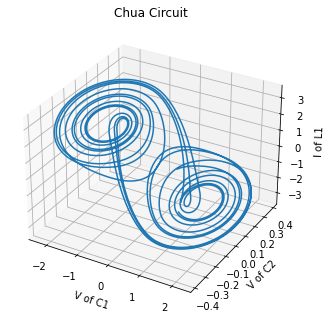

In [2]:
# Defining the derivative function for use with odeint()

def deriv(r, t, alpha, beta, M0, M1):
    
    x, y, z = r.copy()
    drdt = np.zeros(3)
    
    h = M1*x + (abs(x+1) - abs(x-1))*(M0 - M1)/2
    drdt[0] = alpha * (y-x-h)
    drdt[1] = (x-y+z)
    drdt[2] = -beta * y
    
    return drdt

# Setting the initial parameters and solving

r0 = [0.7, 0, 0]
t = np.linspace(0, 30, 10000)
const = (15.6, 28, -1.143, -0.714)
r = odeint(deriv, r0, t, args = const)

x = r[:, 0].T
y = r[:, 1].T
z = r[:, 2].T
    
# Plotting the 3D graph, showing the chaotic model

fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
plot = ax.plot3D(x, y, z)
ax.set_title('Chua Circuit')
ax.set_xlabel('V of C1')
ax.set_ylabel('V of C2')
ax.set_zlabel('I of L1')
plt.show()
    

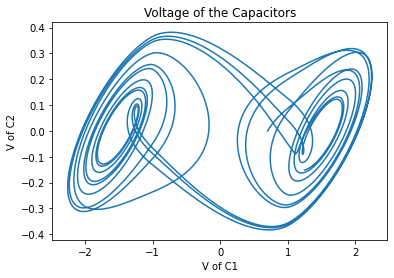

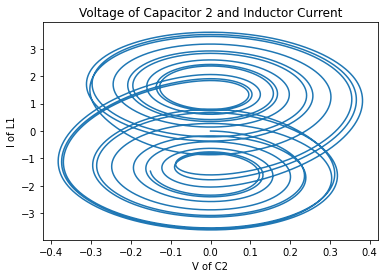

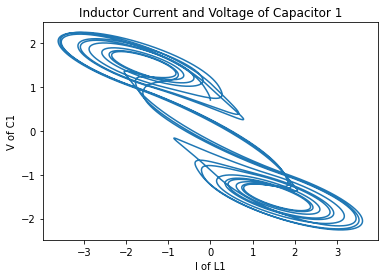

In [3]:
# Projecting the 3D model onto each plane

plt.figure(2)
plt.title('Voltage of the Capacitors')
plt.xlabel('V of C1')
plt.ylabel('V of C2')
plt.plot(x, y)
plt.show(2)


plt.figure(3)
plt.title('Voltage of Capacitor 2 and Inductor Current')
plt.xlabel('V of C2')
plt.ylabel('I of L1')
plt.plot(y, z)
plt.show(3)


plt.figure(4)
plt.title('Inductor Current and Voltage of Capacitor 1')
plt.xlabel('I of L1')
plt.ylabel('V of C1')
plt.plot(z, x)
plt.show(4)

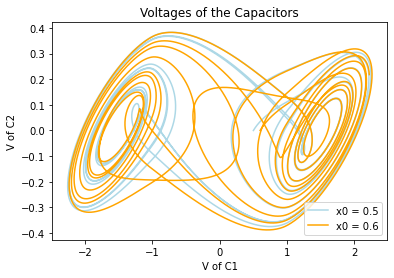

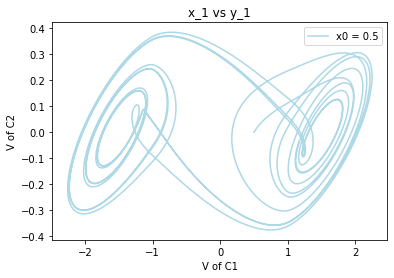

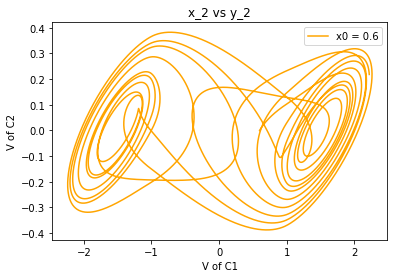

In [4]:
# Comparing slightly different initial conditions shows how greatly the results vary

r0_1 = [0.5, 0, 0]
r0_2 = [0.6, 0, 0]
const = (15.6, 28, -1.143, -0.714)
r_1 = odeint(deriv, r0_1, t, args = const)
r_2 = odeint(deriv, r0_2, t, args = const)

x_1 = r_1[:, 0].T
y_1 = r_1[:, 1].T
z_1 = r_1[:, 2].T

x_2 = r_2[:, 0].T
y_2 = r_2[:, 1].T
z_2 = r_2[:, 2].T

# Combined plot of the two initial conditions

plt.figure(11)
plt.title('Voltages of the Capacitors')
plt.xlabel('V of C1')
plt.ylabel('V of C2')
plt.plot(x_1, y_1, label = 'x0 = 0.5', c = 'lightblue')
plt.plot(x_2, y_2, label = 'x0 = 0.6', c = 'orange')
plt.legend()
plt.show(11)


plt.figure(12)
plt.title('x_1 vs y_1')
plt.xlabel('V of C1')
plt.ylabel('V of C2')
plt.plot(x_1, y_1, label = 'x0 = 0.5', c = 'lightblue')
plt.legend()
plt.show(12)


plt.figure(13)
plt.title('x_2 vs y_2')
plt.xlabel('V of C1')
plt.ylabel('V of C2')
plt.plot(x_2, y_2, label = 'x0 = 0.6', c = 'orange')
plt.legend()
plt.show(13)

## Implementation of a realistic Chua's circuit

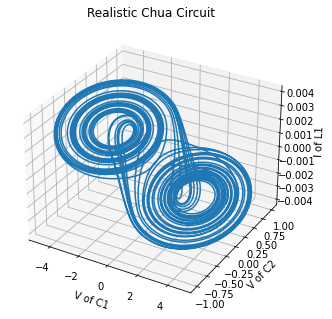

In [5]:
def deriv_real(r, t, batt_V = 9):
    
    x, y, z = r.copy()
    drdt = r.copy()
    
    # Defining the constants
    
    C1  = 10e-9        # 10nF
    C2  = 100e-9       # 100nF
    R = 1800           # 1.8k Ohms
    G = 1/R
    
    # Constants relating to the Chua Diode
    
    R1 = 220
    R2 = 220
    R3 = 2200
    R4 = 22000
    R5 = 22000
    R6 = 3300
    
    EV = batt_V             # 9V Batteries
    E1 = R3/(R2+R3)*EV
    E2 = R6/(R5+R6)*EV
    
    m12 = -1/R6
    m02 = 1/R4
    m01 = 1/R1
    m11 = -1/R3
    
    m1 = m12 + m11
    
    if E1 > E2:
        m0 = m11 + m02
    else:
        m0 = m12 + m01
    
    mm1 = m01 + m02
    Emax = max(E1, E2)
    Emin = min(E1, E2)
    
    if abs(x) < Emin:
        const = x*m1
    elif abs(x) < Emax:
        const = x * m0
        if x > 0:
            const += Emin * (m1-m0)
        else:
            const += Emin * (m0-m1)
    
    elif abs(x) >= Emax:
        const = x * mm1
        if x > 0:
            const += Emax*(m0-mm1) + Emin*(m1-m0)
        else:
            const += Emax*(mm1-m0) + Emin*(m0-m1)
            
    # Constants relating to the Gyrator
    
    R7  = 100              #100 Ohms
    R8  = 1000             #1k Ohms
    R9  = 1000             #1k Ohms
    R10 = 1800
    C   = 100e-9           #100nF
    L = R7*R9*C*R10/R8     #18mH 
    
    # Returning the derivative
    
    drdt[0] = (G*(y-x) - const)/C1
    drdt[1] = (G*(x-y)+z)/C2
    drdt[2] = -y/L
    
    return drdt


# Solving and plotting

r0 = [0.7, 0, 0]
t_real = np.linspace(0, 0.02, 10000)
r = odeint(deriv_real, r0, t_real, args = (9,))

x = r[:, 0].T
y = r[:, 1].T
z = r[:, 2].T
    
# Plotting the 3D graph, showing the chaotic model

fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
plot = ax.plot3D(x, y, z)
ax.set_title('Realistic Chua Circuit')
ax.set_xlabel('V of C1')
ax.set_ylabel('V of C2')
ax.set_zlabel('I of L1')
plt.show()

